In [35]:
import pandas as pd

In [36]:
!cd /mnt/d/幽门螺旋杆菌/Script/分析结果/fineSTRUCTURE/OUTPUT/Chromopainter所有供体 &&\
    find $(pwd) -type f -name "Donor_v_Target.chunkcounts.out"\
    >/mnt/d/幽门螺旋杆菌/Script/分析结果/fineSTRUCTURE/OUTPUT/Chromopainter所有供体/chunckcounts.list

# 首先，将所有的chunk合并

In [37]:
import pandas as pd

# 文件列表所在路径
list_file = "/mnt/d/幽门螺旋杆菌/Script/分析结果/fineSTRUCTURE/OUTPUT/Chromopainter所有供体/chunckcounts.list"

# 读取文件列表（排除空行）
with open(list_file, 'r') as f:
    file_paths = [line.strip() for line in f if line.strip()]

dfs = []
for file in file_paths:
    df = pd.read_csv(file, sep=' ')
    dfs.append(df)

# 合并所有 DataFrame
df_all = pd.concat(dfs, ignore_index=True)



In [38]:
df_all = df_all.drop_duplicates(subset='Recipient')
df_all

,Recipient,hpAfrica1,hpAfrica2,hpAsia2,hpEurope,hpNEAfrica,hpNorthAsia,hpSahul,hpSiberia,hspHAEAsia1,hspHAEAsia2,hspLAEAsia1,hspLAEAsia2A,hspLAEAsia2B,hspLAEAsia3
0,CB1,21.801403,10.992594,132.036511,73.017500,30.830547,150.632195,28.738560,184.811750,675.725965,773.699533,174.164082,283.287683,429.846069,228.696232
1,CB10,31.162512,13.885942,213.634996,123.944187,45.462462,312.757676,41.529256,362.175046,622.490760,496.028745,224.319298,314.617415,467.599276,236.354524
2,CB11,25.509853,12.914011,129.912040,69.790606,36.625579,188.124896,36.066263,167.132208,685.366600,670.415217,181.318253,298.288723,411.707381,211.777191
3,CB12,26.612296,11.262128,146.768193,101.872230,33.968173,248.290299,43.208913,254.541200,603.250509,530.841555,221.873660,340.067833,516.220844,293.778310
4,CB13,26.938254,10.336867,126.534829,94.910094,39.184534,209.049678,37.805804,203.686839,724.174214,599.794555,211.471177,277.744778,441.727307,224.049115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,HEL_CA5899AA_AS,16.905169,9.768090,50.997090,45.255898,20.845280,175.936035,35.436441,125.075425,294.191904,244.014410,241.100338,425.011871,550.566892,735.803661
3816,HEL_CA5900AA_AS,27.653944,10.750525,71.288060,68.812488,38.694442,154.313695,31.986512,142.372343,326.540163,310.521696,314.122648,562.332936,719.155777,334.165508
3817,HEL_CA5901AA_AS,33.642222,13.734108,75.617929,67.810830,49.327240,227.120360,37.542561,144.174298,256.871389,236.573269,379.834353,819.419758,527.810695,346.735876
3818,HEL_CA5902AA_AS,17.450953,7.263794,62.101863,56.921192,26.584023,239.296368,32.125778,168.380270,229.451165,221.456165,247.361927,551.322703,432.679685,644.167014


In [39]:
df_all.to_csv('/mnt/c/Users/victo/Desktop/chromopainter_result.csv',index=False)

## 为每个ID添加属性

In [40]:
# 假设第一列是 'Recipient'，其余为数值型数据
df_all['属性'] = df_all.iloc[:, 1:].idxmax(axis=1)

In [41]:
df_all

,Recipient,hpAfrica1,hpAfrica2,hpAsia2,hpEurope,hpNEAfrica,hpNorthAsia,hpSahul,hpSiberia,hspHAEAsia1,hspHAEAsia2,hspLAEAsia1,hspLAEAsia2A,hspLAEAsia2B,hspLAEAsia3,属性
0,CB1,21.801403,10.992594,132.036511,73.017500,30.830547,150.632195,28.738560,184.811750,675.725965,773.699533,174.164082,283.287683,429.846069,228.696232,hspHAEAsia2
1,CB10,31.162512,13.885942,213.634996,123.944187,45.462462,312.757676,41.529256,362.175046,622.490760,496.028745,224.319298,314.617415,467.599276,236.354524,hspHAEAsia1
2,CB11,25.509853,12.914011,129.912040,69.790606,36.625579,188.124896,36.066263,167.132208,685.366600,670.415217,181.318253,298.288723,411.707381,211.777191,hspHAEAsia1
3,CB12,26.612296,11.262128,146.768193,101.872230,33.968173,248.290299,43.208913,254.541200,603.250509,530.841555,221.873660,340.067833,516.220844,293.778310,hspHAEAsia1
4,CB13,26.938254,10.336867,126.534829,94.910094,39.184534,209.049678,37.805804,203.686839,724.174214,599.794555,211.471177,277.744778,441.727307,224.049115,hspHAEAsia1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,HEL_CA5899AA_AS,16.905169,9.768090,50.997090,45.255898,20.845280,175.936035,35.436441,125.075425,294.191904,244.014410,241.100338,425.011871,550.566892,735.803661,hspLAEAsia3
3816,HEL_CA5900AA_AS,27.653944,10.750525,71.288060,68.812488,38.694442,154.313695,31.986512,142.372343,326.540163,310.521696,314.122648,562.332936,719.155777,334.165508,hspLAEAsia2B
3817,HEL_CA5901AA_AS,33.642222,13.734108,75.617929,67.810830,49.327240,227.120360,37.542561,144.174298,256.871389,236.573269,379.834353,819.419758,527.810695,346.735876,hspLAEAsia2A
3818,HEL_CA5902AA_AS,17.450953,7.263794,62.101863,56.921192,26.584023,239.296368,32.125778,168.380270,229.451165,221.456165,247.361927,551.322703,432.679685,644.167014,hspLAEAsia3


In [42]:
df_all.to_csv('/mnt/c/Users/victo/Desktop/Chromopainter结果整理.csv',index=False)

# 现在，继续对chunk进行一些操作

In [43]:
df_all.columns

Index(['Recipient', 'hpAfrica1', 'hpAfrica2', 'hpAsia2', 'hpEurope',
       'hpNEAfrica', 'hpNorthAsia', 'hpSahul', 'hpSiberia', 'hspHAEAsia1',
       'hspHAEAsia2', 'hspLAEAsia1', 'hspLAEAsia2A', 'hspLAEAsia2B',
       'hspLAEAsia3', '属性'],
      dtype='object')

In [44]:
df_all.groupby('属性').size()

属性
hpAfrica1        21
hpAfrica2        20
hpAsia2         373
hpEurope         45
hpNEAfrica       24
hpNorthAsia     118
hpSahul          43
hpSiberia       274
hspHAEAsia1     267
hspHAEAsia2     287
hspLAEAsia1     539
hspLAEAsia2A    728
hspLAEAsia2B    715
hspLAEAsia3     366
dtype: int64

# 可视化

In [45]:

import pandas as pd
import matplotlib.pyplot as plt
from aquarel import load_theme
theme = load_theme('boxy_light')
theme.apply()
# 假设 df_高低 已经存在，并且包含 '属性2' 和各成分列
components = [
 'hpAfrica1',
 'hpAfrica2',
 'hpAsia2',
 'hpEurope',
 'hpNEAfrica',
 'hpNorthAsia',
 'hpSahul',
 'hpSiberia',
 'hspHAEAsia1',
 'hspHAEAsia2',
 'hspLAEAsia1',
 'hspLAEAsia2A',
 'hspLAEAsia2B',
 'hspLAEAsia3'
]

# 建立成分与颜色的对应字典
color_mapping = {
    "hpAfrica1": '#123029',
    "hpAfrica2": '#000000',
    "hpAsia2": '#FFD966',
    "hpEurope": '#d11fae',
    "hpNEAfrica": '#C1D2D1',
    "hpNorthAsia": '#521E1B',
    "hpSahul": '#D5B7ED',
    "hpSiberia": '#c27994',
    "hspHAEAsia1": '#468B9F',
    "hspHAEAsia2": '#B33C23',
    "hspLAEAsia1": '#CCC49C',
    "hspLAEAsia2A": '#C77642',
    "hspLAEAsia2B": '#7F8C8D',
    "hspLAEAsia3": '#E7892C'
}

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# 对数据按照 '属性2' 分组，然后计算每个群体内各个个体成分占比的平均值
grouped = df_all.groupby('属性')
avg_compositions = {}  # 存储每个分组计算得到的平均成分占比

for group_name, group_data in grouped:
    df_temp = group_data.copy()
    # 计算每个个体的成分总和
    df_temp['Total'] = df_temp[components].sum(axis=1)
    # 将每个成分转换为占比
    for comp in components:
        df_temp[comp] = df_temp[comp] / df_temp['Total']
    # 计算当前分组各成分的平均占比
    avg_compositions[group_name] = df_temp[components].mean()

# 根据 hspLAEAsia 的平均占比由低到高排列分组
group_names = sorted(avg_compositions.keys(), key=lambda g: avg_compositions[g]['hspLAEAsia3'])
positions = list(range(len(group_names)))

# 准备绘图
fig, ax = plt.subplots(figsize=(10, 6))

# 初始化每个柱的底部高度为 0
bottom = [0] * len(group_names)

# 对于每个成分依次堆叠
for comp in components:
    # 取出每个分组该成分的平均占比，按照排序后的顺序
    heights = [avg_compositions[group][comp] for group in group_names]
    ax.bar(positions, heights, bottom=bottom, label=comp, color=color_mapping.get(comp))
    # 更新堆叠的底部
    bottom = [b + h for b, h in zip(bottom, heights)]

ax.set_xticks(positions)
ax.set_xticklabels(group_names, rotation=90, ha='right')
ax.set_ylabel("")
ax.set_title("")
plt.grid(False)

# 去除重复图例项
handles, labels = ax.get_legend_handles_labels()
legend_dict = dict(zip(labels, handles))
ax.legend(legend_dict.values(), legend_dict.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
theme.apply_transforms()
plt.savefig('/mnt/c/Users/victo/Desktop/Chromopantainer.pdf')
plt.show()


KeyboardInterrupt: 

In [ ]:
df_all['属性'].value_counts()

属性
hspLAEAsia2A    728
hspLAEAsia2B    715
hspLAEAsia1     539
hpAsia2         373
hspLAEAsia3     366
hspHAEAsia2     287
hpSiberia       274
hspHAEAsia1     267
hpNorthAsia     118
hpEurope         45
hpSahul          43
hpNEAfrica       24
hpAfrica1        21
hpAfrica2        20
Name: count, dtype: int64

# 我还是观察到hspLAEAsia2的成分不纯净

In [ ]:
df_all.columns.tolist()

['Recipient',
 'hpAfrica1',
 'hpAfrica2',
 'hpAsia2',
 'hpEurope',
 'hpNEAfrica',
 'hpNorthAsia',
 'hpSahul',
 'hpSiberia',
 'hspHAEAsia1',
 'hspHAEAsia2',
 'hspLAEAsia1',
 'hspLAEAsia2A',
 'hspLAEAsia2B',
 'hspLAEAsia3',
 '属性']

In [ ]:
# 把属性为hspLAEAsia2的提取出来
df_hspLAEAsia2 = df_all.loc[df_all['属性'].str.startswith('hspLAEAsia2')]
df_hspLAEAsia2

,Recipient,hpAfrica1,hpAfrica2,hpAsia2,hpEurope,hpNEAfrica,hpNorthAsia,hpSahul,hpSiberia,hspHAEAsia1,hspHAEAsia2,hspLAEAsia1,hspLAEAsia2A,hspLAEAsia2B,hspLAEAsia3,属性
48,CB56,26.396222,11.036145,123.418111,102.865207,42.694646,211.555562,45.309919,198.586277,342.446403,324.050827,279.594609,516.222573,716.379545,322.137457,hspLAEAsia2B
89,GCA_000011725.1,21.185585,7.942321,96.178450,75.668361,40.328445,359.260941,38.617738,221.171291,305.354936,290.500031,269.060973,427.506202,638.832790,387.193231,hspLAEAsia2B
91,GCA_000023805.1,42.845205,16.637891,167.686183,149.696569,64.165886,337.618848,42.490889,276.287530,308.029962,295.013296,268.897624,433.803424,620.096447,357.239225,hspLAEAsia2B
110,GCA_000287735.1,20.521233,9.347577,58.176862,58.253590,23.689098,162.908088,37.552412,129.643578,297.794565,248.593661,267.347309,461.219092,868.938434,336.396718,hspLAEAsia2B
111,GCA_000287755.1,27.726522,10.988502,76.922786,61.571532,28.070091,192.862697,28.944157,142.823547,305.984442,306.929400,244.993226,485.216539,828.206890,339.777254,hspLAEAsia2B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,HEL_CA5893AA_AS,33.224968,10.465154,81.228535,70.098549,51.802113,155.749694,37.542712,114.940821,254.251395,245.533000,413.865418,878.620252,508.378463,283.812774,hspLAEAsia2A
3810,HEL_CA5894AA_AS,16.726915,11.968545,74.049205,66.912623,26.214546,309.396860,35.273218,183.778756,312.247010,294.664574,265.866357,485.054567,674.176044,373.154845,hspLAEAsia2B
3812,HEL_CA5896AA_AS,25.504003,9.419814,81.085048,71.171270,30.509236,286.675484,30.103992,192.235771,326.837661,291.904689,270.111996,455.055674,627.637532,484.289235,hspLAEAsia2B
3816,HEL_CA5900AA_AS,27.653944,10.750525,71.288060,68.812488,38.694442,154.313695,31.986512,142.372343,326.540163,310.521696,314.122648,562.332936,719.155777,334.165508,hspLAEAsia2B


In [ ]:
# 着重探索hspLAEAsia2A和hspLAEAsia2B之间的组成成分的差异
import numpy as np
df_hspLAEAsia2['2A2B差值'] = df_hspLAEAsia2['hspLAEAsia2A'] - df_hspLAEAsia2['hspLAEAsia2B']
df_hspLAEAsia2

/tmp/ipykernel_33807/2608833115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hspLAEAsia2['2A2B差值'] = df_hspLAEAsia2['hspLAEAsia2A'] - df_hspLAEAsia2['hspLAEAsia2B']


,Recipient,hpAfrica1,hpAfrica2,hpAsia2,hpEurope,hpNEAfrica,hpNorthAsia,hpSahul,hpSiberia,hspHAEAsia1,hspHAEAsia2,hspLAEAsia1,hspLAEAsia2A,hspLAEAsia2B,hspLAEAsia3,属性,2A2B差值
48,CB56,26.396222,11.036145,123.418111,102.865207,42.694646,211.555562,45.309919,198.586277,342.446403,324.050827,279.594609,516.222573,716.379545,322.137457,hspLAEAsia2B,-200.156972
89,GCA_000011725.1,21.185585,7.942321,96.178450,75.668361,40.328445,359.260941,38.617738,221.171291,305.354936,290.500031,269.060973,427.506202,638.832790,387.193231,hspLAEAsia2B,-211.326588
91,GCA_000023805.1,42.845205,16.637891,167.686183,149.696569,64.165886,337.618848,42.490889,276.287530,308.029962,295.013296,268.897624,433.803424,620.096447,357.239225,hspLAEAsia2B,-186.293023
110,GCA_000287735.1,20.521233,9.347577,58.176862,58.253590,23.689098,162.908088,37.552412,129.643578,297.794565,248.593661,267.347309,461.219092,868.938434,336.396718,hspLAEAsia2B,-407.719342
111,GCA_000287755.1,27.726522,10.988502,76.922786,61.571532,28.070091,192.862697,28.944157,142.823547,305.984442,306.929400,244.993226,485.216539,828.206890,339.777254,hspLAEAsia2B,-342.990351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,HEL_CA5893AA_AS,33.224968,10.465154,81.228535,70.098549,51.802113,155.749694,37.542712,114.940821,254.251395,245.533000,413.865418,878.620252,508.378463,283.812774,hspLAEAsia2A,370.241789
3810,HEL_CA5894AA_AS,16.726915,11.968545,74.049205,66.912623,26.214546,309.396860,35.273218,183.778756,312.247010,294.664574,265.866357,485.054567,674.176044,373.154845,hspLAEAsia2B,-189.121477
3812,HEL_CA5896AA_AS,25.504003,9.419814,81.085048,71.171270,30.509236,286.675484,30.103992,192.235771,326.837661,291.904689,270.111996,455.055674,627.637532,484.289235,hspLAEAsia2B,-172.581858
3816,HEL_CA5900AA_AS,27.653944,10.750525,71.288060,68.812488,38.694442,154.313695,31.986512,142.372343,326.540163,310.521696,314.122648,562.332936,719.155777,334.165508,hspLAEAsia2B,-156.822841


In [ ]:
import seaborn as sns
from aquarel import load_theme
theme = load_theme('boxy_light')
theme.apply()
import matplotlib.pyplot as plt    # 设置字体和生成图形中文本为矢量可编辑
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.unicode_minus'] = False

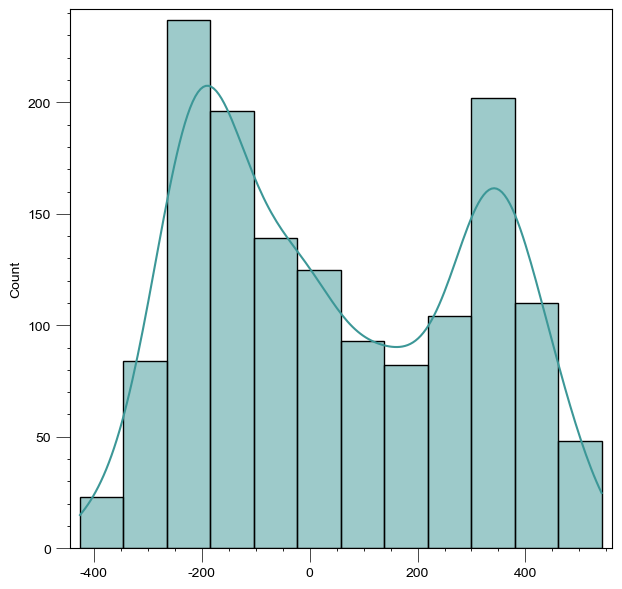

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(data = df_hspLAEAsia2.loc[:,['Recipient','2A2B差值']],
             kde=True,
             legend=False)
plt.grid(False)
plt.xlabel('')
theme.apply_transforms()
plt.savefig('Chromopantainerhsp2A_2B分布.pdf')
plt.show()

注意到hspLAEAsia2A和2B对受体的贡献差异从-400到400不等。我们倾向于将贡献差异不大的受体重新命名为hspLAEAsia2AB,表示混合型。

In [ ]:
# 计算“2A2B差值”的标准差 sigma
sigma = df_hspLAEAsia2['2A2B差值'].std()

# 设定 k 值为 0.5，计算阈值
k = 0.5
threshold = k * sigma

# 构造掩码：绝对差值小于等于阈值的行
mask = df_hspLAEAsia2['2A2B差值'].abs() <= threshold

# 将这些行的“属性”列更新为 "hspLAEAsia2AB"
df_hspLAEAsia2.loc[mask, '属性'] = 'hspLAEAsia2AB'

# 可选：打印一下更新后的数据摘要，验证更正效果
print(df_hspLAEAsia2['属性'].value_counts())

属性
hspLAEAsia2A     574
hspLAEAsia2B     495
hspLAEAsia2AB    374
Name: count, dtype: int64


In [ ]:
df_hspLAEAsia2.to_csv('/mnt/c/Users/victo/Desktop/Chromopainter_df_hspLAEAsia2.csv',index=False)

,Recipient,hpAfrica1,hpAfrica2,hpAsia2,hpEurope,hpNEAfrica,hpNorthAsia,hpSahul,hpSiberia,hspHAEAsia1,hspHAEAsia2,hspLAEAsia1,hspLAEAsia2A,hspLAEAsia2B,hspLAEAsia3,属性,2A2B差值
48,CB56,26.396222,11.036145,123.418111,102.865207,42.694646,211.555562,45.309919,198.586277,342.446403,324.050827,279.594609,516.222573,716.379545,322.137457,hspLAEAsia2B,-200.156972
89,GCA_000011725.1,21.185585,7.942321,96.178450,75.668361,40.328445,359.260941,38.617738,221.171291,305.354936,290.500031,269.060973,427.506202,638.832790,387.193231,hspLAEAsia2B,-211.326588
91,GCA_000023805.1,42.845205,16.637891,167.686183,149.696569,64.165886,337.618848,42.490889,276.287530,308.029962,295.013296,268.897624,433.803424,620.096447,357.239225,hspLAEAsia2B,-186.293023
110,GCA_000287735.1,20.521233,9.347577,58.176862,58.253590,23.689098,162.908088,37.552412,129.643578,297.794565,248.593661,267.347309,461.219092,868.938434,336.396718,hspLAEAsia2B,-407.719342
111,GCA_000287755.1,27.726522,10.988502,76.922786,61.571532,28.070091,192.862697,28.944157,142.823547,305.984442,306.929400,244.993226,485.216539,828.206890,339.777254,hspLAEAsia2B,-342.990351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,HEL_CA5893AA_AS,33.224968,10.465154,81.228535,70.098549,51.802113,155.749694,37.542712,114.940821,254.251395,245.533000,413.865418,878.620252,508.378463,283.812774,hspLAEAsia2A,370.241789
3810,HEL_CA5894AA_AS,16.726915,11.968545,74.049205,66.912623,26.214546,309.396860,35.273218,183.778756,312.247010,294.664574,265.866357,485.054567,674.176044,373.154845,hspLAEAsia2B,-189.121477
3812,HEL_CA5896AA_AS,25.504003,9.419814,81.085048,71.171270,30.509236,286.675484,30.103992,192.235771,326.837661,291.904689,270.111996,455.055674,627.637532,484.289235,hspLAEAsia2B,-172.581858
3816,HEL_CA5900AA_AS,27.653944,10.750525,71.288060,68.812488,38.694442,154.313695,31.986512,142.372343,326.540163,310.521696,314.122648,562.332936,719.155777,334.165508,hspLAEAsia2B,-156.822841


# 五、将hspLAEAsia2作为受体看看？

In [ ]:
import pandas as pd

In [ ]:
df_基础信息 = pd.read_csv('/mnt/c/Users/victo/Desktop/HP数据收集.csv')
df_基础信息.loc[:,['ID','Chromopainter4']]

,ID,Chromopainter4
0,GCA_000274385.2,hpAfrica1
1,GCA_014496365.1,hpAfrica1
2,GCA_034853475.1,hpAfrica1
3,GCA_035063205.1,hpAfrica1
4,GCA_035182185.1,hpAfrica1
...,...,...
11714,GCA_902846255.1,hpEurope
11715,GCA_902849895.1,hpEurope
11716,GCA_902849915.1,hpEurope
11717,GCA_902849965.1,hpEurope


In [ ]:
df_hspLAEAsia2作为受体 = pd.read_csv('/mnt/d/幽门螺旋杆菌/Script/分析结果/fineSTRUCTURE/OUTPUT/ChromoPainternoLAEAsia2作受体/merged.chunkcounts',sep=' ')
df_hspLAEAsia2作为受体 = df_hspLAEAsia2作为受体.drop_duplicates(subset='Recipient').merge(df_基础信息.loc[:,['ID','Chromopainter4']],left_on='Recipient',right_on='ID',how='left').drop(columns=['ID']).sort_values(by='Chromopainter4').reset_index(drop=True).rename(columns={'Chromopainter4':'属性'})

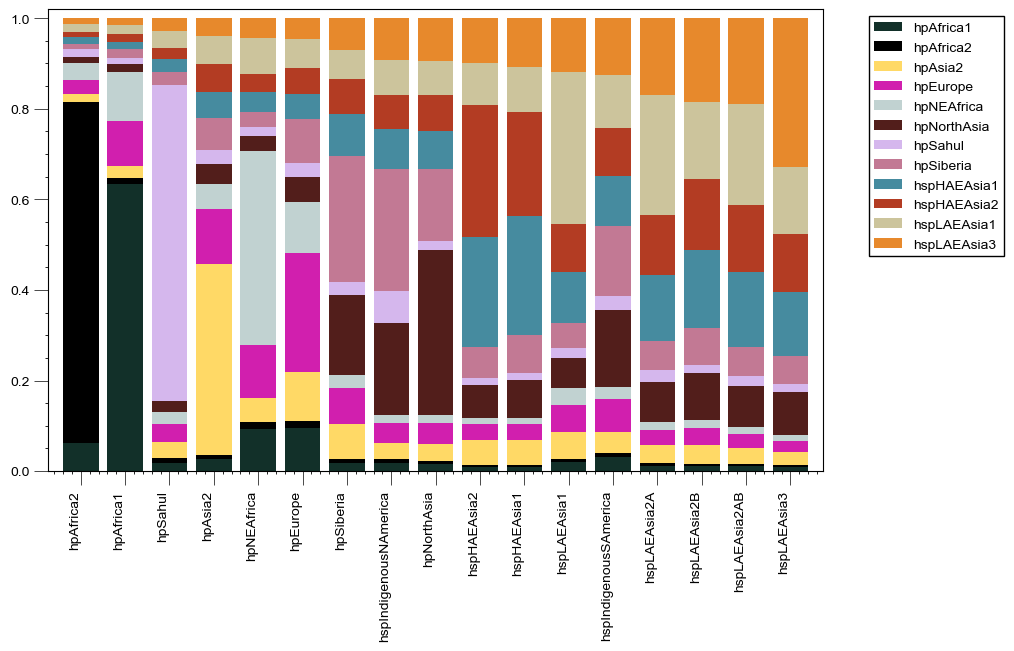

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from aquarel import load_theme
theme = load_theme('boxy_light')
theme.apply()
df_all = df_hspLAEAsia2作为受体
# 假设 df_高低 已经存在，并且包含 '属性2' 和各成分列
components = [
 'hpAfrica1',
 'hpAfrica2',
 'hpAsia2',
 'hpEurope',
 'hpNEAfrica',
 'hpNorthAsia',
 'hpSahul',
 'hpSiberia',
 'hspHAEAsia1',
 'hspHAEAsia2',
 'hspLAEAsia1',
 'hspLAEAsia3'
]

# 建立成分与颜色的对应字典
color_mapping = {
    "hpAfrica1": '#123029',
    "hpAfrica2": '#000000',
    "hpAsia2": '#FFD966',
    "hpEurope": '#d11fae',
    "hpNEAfrica": '#C1D2D1',
    "hpNorthAsia": '#521E1B',
    "hpSahul": '#D5B7ED',
    "hpSiberia": '#c27994',
    "hspHAEAsia1": '#468B9F',
    "hspHAEAsia2": '#B33C23',
    "hspLAEAsia1": '#CCC49C',
    "hspLAEAsia3": '#E7892C'
}

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# 对数据按照 '属性2' 分组，然后计算每个群体内各个个体成分占比的平均值
grouped = df_all.groupby('属性')
avg_compositions = {}  # 存储每个分组计算得到的平均成分占比

for group_name, group_data in grouped:
    df_temp = group_data.copy()
    # 计算每个个体的成分总和
    df_temp['Total'] = df_temp[components].sum(axis=1)
    # 将每个成分转换为占比
    for comp in components:
        df_temp[comp] = df_temp[comp] / df_temp['Total']
    # 计算当前分组各成分的平均占比
    avg_compositions[group_name] = df_temp[components].mean()

# 根据 hspLAEAsia 的平均占比由低到高排列分组
group_names = sorted(avg_compositions.keys(), key=lambda g: avg_compositions[g]['hspLAEAsia3'])
positions = list(range(len(group_names)))

# 准备绘图
fig, ax = plt.subplots(figsize=(10, 6))

# 初始化每个柱的底部高度为 0
bottom = [0] * len(group_names)

# 对于每个成分依次堆叠
for comp in components:
    # 取出每个分组该成分的平均占比，按照排序后的顺序
    heights = [avg_compositions[group][comp] for group in group_names]
    ax.bar(positions, heights, bottom=bottom, label=comp, color=color_mapping.get(comp))
    # 更新堆叠的底部
    bottom = [b + h for b, h in zip(bottom, heights)]

ax.set_xticks(positions)
ax.set_xticklabels(group_names, rotation=90, ha='right')
ax.set_ylabel("")
ax.set_title("")
plt.grid(False)

# 去除重复图例项
handles, labels = ax.get_legend_handles_labels()
legend_dict = dict(zip(labels, handles))
ax.legend(legend_dict.values(), legend_dict.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
theme.apply_transforms()
plt.savefig('/mnt/c/Users/victo/Desktop/Chromopantainer.pdf')
plt.show()


In [ ]:
df_hspLAEAsia2作为受体_hspLAEAsia2 = df_hspLAEAsia2作为受体.loc[df_hspLAEAsia2作为受体['属性'].str.startswith('hspLAEAsia2')]
df_hspLAEAsia2作为受体_hspLAEAsia2

,Recipient,hpAfrica1,hpAfrica2,hpAsia2,hpEurope,hpNEAfrica,hpNorthAsia,hpSahul,hpSiberia,hspHAEAsia1,hspHAEAsia2,hspLAEAsia1,hspLAEAsia3,属性
1999,GCA_004117955.1,31.717662,19.725099,117.467760,133.163133,78.889163,287.405572,84.767481,201.562242,508.977912,448.121296,817.732969,569.417702,hspLAEAsia2A
2000,GCA_004117945.1,28.198765,23.705776,116.755232,152.548832,52.152127,271.798007,70.304804,207.663547,480.183078,440.735776,795.314714,564.797350,hspLAEAsia2A
2001,GCA_006440155.1,70.419921,22.957855,279.402851,214.635389,148.294016,252.096087,91.877671,214.698854,492.949238,412.164248,768.343675,446.912718,hspLAEAsia2A
2002,GCA_001940175.1,30.079695,15.726260,99.586751,109.338322,49.433005,277.975641,90.114902,199.885201,496.199746,420.271019,884.028079,513.050744,hspLAEAsia2A
2003,GCA_001940145.1,32.336816,16.092171,105.227999,90.362407,40.608187,286.513461,63.231825,199.394828,475.354662,433.837234,836.094766,550.717842,hspLAEAsia2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,HEL_AA4438AA_AS,22.542651,11.496781,88.115188,80.949350,29.182372,286.934986,49.473463,199.248389,467.342633,421.035409,486.779532,854.775370,hspLAEAsia2B
3477,GCA_013431145.1,45.120003,16.643020,194.753533,193.544491,87.102304,360.470842,55.953085,403.875933,557.589745,464.581042,467.229261,514.560077,hspLAEAsia2B
3478,HEL_AA0351AA_AS,30.758454,16.627852,176.642590,128.069265,46.109107,301.420454,53.675607,288.895013,737.595008,686.686714,380.230434,430.316236,hspLAEAsia2B
3479,GCA_013430115.1,42.248582,14.355224,159.711034,169.851015,77.419983,307.322316,58.477660,284.900255,541.263103,518.118082,583.903539,554.253084,hspLAEAsia2B


In [ ]:
df_long = df_hspLAEAsia2作为受体_hspLAEAsia2.melt(
    id_vars=["Recipient", "属性"],
    value_vars=["hpAfrica1", "hpAfrica2", "hpAsia2", "hpEurope", "hpNEAfrica", "hpNorthAsia", "hpSahul", "hpSiberia", "hspHAEAsia1", "hspHAEAsia2", "hspLAEAsia1", "hspLAEAsia3"],
    var_name="供体",
    value_name="贡献值"
)
df_long

,Recipient,属性,供体,贡献值
0,GCA_004117955.1,hspLAEAsia2A,hpAfrica1,31.717662
1,GCA_004117945.1,hspLAEAsia2A,hpAfrica1,28.198765
2,GCA_006440155.1,hspLAEAsia2A,hpAfrica1,70.419921
3,GCA_001940175.1,hspLAEAsia2A,hpAfrica1,30.079695
4,GCA_001940145.1,hspLAEAsia2A,hpAfrica1,32.336816
...,...,...,...,...
17779,HEL_AA4438AA_AS,hspLAEAsia2B,hspLAEAsia3,854.775370
17780,GCA_013431145.1,hspLAEAsia2B,hspLAEAsia3,514.560077
17781,HEL_AA0351AA_AS,hspLAEAsia2B,hspLAEAsia3,430.316236
17782,GCA_013430115.1,hspLAEAsia2B,hspLAEAsia3,554.253084


图X. 展示不同供体（Donor）在三种受体（“hspLAEAsia2A”、“hspLAEAsia2B”、“hspLAEAsia2AB”）中贡献值分布的箱线图。
每个子图对应一个特定供体，横坐标为全局归一化后的贡献值，纵坐标为受体类型。全局归一化采用以下公式，将原始贡献值映射到[0,1] 区间。
normalized = (x - global_min) / (global_max - global_min)
箱线图中，箱体表示贡献值的四分位数范围，须状线代表范围延伸，散点标记为离群值。不同颜色对应不同的供体。


Figure X. Box plots illustrating the distribution of contributions from different donors across three recipients (“hspLAEAsia2A”, “hspLAEAsia2B”, and “hspLAEAsia2AB”). 

Each subplot represents a specific donor, with the x-axis displaying the globally normalized contribution and the y-axis indicating recipient categories. 

The global normalization maps the raw contribution values to the [0,1] interval using the formula:

normalized = (x - global_min) / (global_max - global_min)

In the box plots, the boxes indicate the interquartile range of contribution values, whiskers show the spread, and dots denote outliers. Different colors correspond to individual donors.

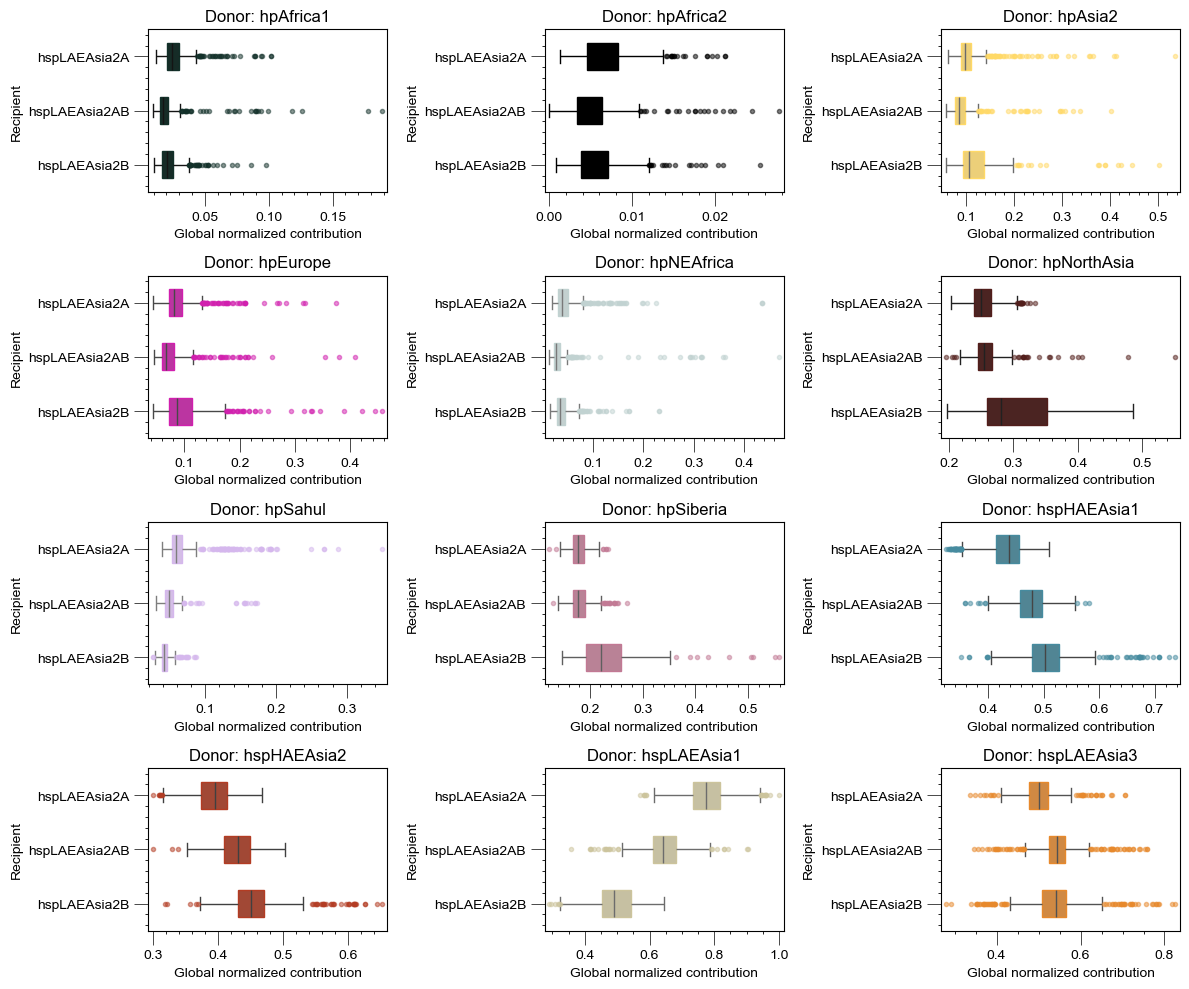

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from aquarel import load_theme
import math

# 加载主题
theme = load_theme('boxy_light')
theme.apply()

# 全局参数设置
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.unicode_minus'] = False

# 定义颜色映射字典
colors = {
    "hpAfrica1": '#123029',
    "hpAfrica2": '#000000',
    "hpAsia2": '#FFD966',
    "hpEurope": '#d11fae',
    "hpNEAfrica": '#C1D2D1',
    "hpNorthAsia": '#521E1B',
    "hpSahul": '#D5B7ED',
    "hpSiberia": '#c27994',
    "hspHAEAsia1": '#468B9F',
    "hspHAEAsia2": '#B33C23',
    "hspLAEAsia1": '#CCC49C',
    "hspLAEAsia3": '#E7892C'
}

# 有效的受体列表（y轴只显示这3个）
valid_recipients = ["hspLAEAsia2A", "hspLAEAsia2B", "hspLAEAsia2AB"]

# 计算全局归一化用的最小值和最大值（仅限有效受体）
global_data = df_long[df_long["属性"].isin(valid_recipients)]
global_min = global_data["贡献值"].min()
global_max = global_data["贡献值"].max()

# 使用全局归一化公式：
# normalized = (x - global_min) / (global_max - global_min)
df_long["global_normalized"] = (df_long["贡献值"] - global_min) / (global_max - global_min)

# 获取在数据中存在的供体列表，确保只处理你关心的供体
donor_list = [donor for donor in colors.keys() if donor in df_long['供体'].unique()]

# 设置每行2个子图，计算需要的行数
n_donors = len(donor_list)
n_cols = 3
n_rows = math.ceil(n_donors / n_cols)

# 创建子图对象
# 创建子图对象（每个子图尺寸更小）
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(4 * n_cols, 2.5 * n_rows),  # 缩小每个子图尺寸
    squeeze=False
)

# 遍历每个供体，将绘图放入对应子图
for i, donor in enumerate(donor_list):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row][col]
    
    donor_data = df_long[df_long["供体"] == donor].copy()
    # 仅保留受体在有效列表中的数据
    donor_data = donor_data[donor_data["属性"].isin(valid_recipients)]
    
    # 绘制水平箱线图：x轴为全局归一化后的贡献值，y轴为受体（属性）
    sns.boxplot(
        data=donor_data, 
        x="global_normalized", 
        y="属性", 
        color=colors[donor],
        width=0.5,
        showfliers=True,  # 开启离群点
        flierprops=dict(
            marker='o',
            markersize=3,
            markerfacecolor=colors[donor],
            markeredgecolor=colors[donor],
            alpha=0.5,
        ),
        boxprops={'edgecolor': colors[donor]},
        ax=ax
)

    ax.set_title(f"Donor: {donor}")
    ax.grid(False)
    ax.set_xlabel("Global normalized contribution")
    ax.set_ylabel("Recipient")

# 删除多余的空白子图（如果有的话）
total_subplots = n_rows * n_cols
if n_donors < total_subplots:
    for j in range(n_donors, total_subplots):
        row = j // n_cols
        col = j % n_cols
        fig.delaxes(axes[row][col])

theme.apply_transforms()
plt.tight_layout()
plt.savefig('/mnt/c/Users/victo/Desktop/Chromopantainer_2.pdf')
plt.show()
